In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"airbnb-kaggle\AB_NYC_2019.csv")

In [3]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


## Questions to be asked
- What does the data comprise of
    - Dimensions : done
    - Variable data types : done
    - Descriptive Stats : done
    - Missing Values : done with count
    - Data Distribution 
- Creating required variables and dropping useless variables
- Uni-Variate / Bi-Variate / Multi-Variate Analysis 
- Hypothesis Testing
- Statistical Tests


In [4]:
#Dimensions
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 48895 rows and 16 columns


In [5]:
# Data types of variables and count of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Missing value count and percentage
print(round(df.isna().mean()*100,2)) , print('-'*70),print(df.isna().sum())

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64
----------------------------------------------------------------------
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                          

(None, None, None)

In [7]:
# Seperating Categorical and Numerical Variables
cat_var=df.select_dtypes(include='object').columns.tolist()
num_var=df.select_dtypes(exclude='object').columns.tolist()
        
print(f"Categotical variables : {cat_var}, Count:{len(cat_var)}\n")
print(f"Numerical variables : {num_var}, Count: {len(num_var)}")

Categotical variables : ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], Count:6

Numerical variables : ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], Count: 10


In [8]:
df[num_var].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df[cat_var].describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [10]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [11]:
df['name_2']=df["name"].str.replace('.',' ').str.strip('.?!,$').str.lower().str.split().str.join(" ")


In [12]:
df.loc[:4,['name','name_2']]

,name,name_2
0,Clean & quiet apt home by the park,clean & quiet apt home by the park
1,Skylit Midtown Castle,skylit midtown castle
2,THE VILLAGE OF HARLEM....NEW YORK !,the village of harlem new york
3,Cozy Entire Floor of Brownstone,cozy entire floor of brownstone
4,Entire Apt: Spacious Studio/Loft by central park,entire apt: spacious studio/loft by central park


In [13]:
df['num_of_char_in_name']=df['name_2'].str.split().str.len()

In [14]:
df['number_of_reviews']=df['number_of_reviews'].replace(np.nan,0)
df['reviews_per_month']=df['reviews_per_month'].replace(np.nan,0)

In [38]:
df[["name","host_id","last_review","months_from_latest_overall_rev","price"]].query('host_id==2787')

,name,host_id,last_review,months_from_latest_overall_rev,price
0,Clean & quiet apt home by the park,2787,2018-10-19,9.0,149
10372,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,2018-10-27,8.0,99
13583,Torre del Lago Room.,2787,2019-06-26,0.0,79
13688,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,2019-05-11,2.0,149
13963,"La Spezia room. Clean, quiet and comfortable bed",2787,2018-09-29,9.0,79
21556,Brooklyn home. Comfort and clean. Liguria room.,2787,2019-06-08,1.0,49


In [27]:
df["last_review"]=pd.to_datetime(df["last_review"])
df['last_review'].describe()

count                   38843
unique                   1764
top       2019-06-23 00:00:00
freq                     1413
first     2011-03-28 00:00:00
last      2019-07-08 00:00:00
Name: last_review, dtype: object

In [31]:
df["months_from_latest_overall_rev"]=round((np.datetime64("2019-07-08")-df['last_review'])/np.timedelta64(1,'M'))

In [34]:
df["months_from_latest_overall_rev"]=df["months_from_latest_overall_rev"].replace(np.nan,0)

In [36]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'name_2', 'num_of_char_in_name',
       'months_from_latest_overall_rev'],
      dtype='object')

In [16]:
Dist_req_var=['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count',
              'availability_365', 'num_of_char_in_name', 'latitude','longitude']

Text(0.5, 0, 'price')

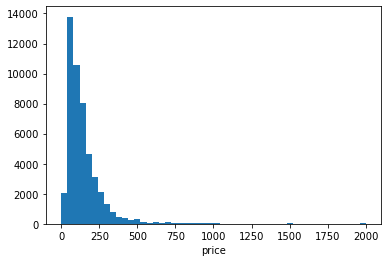

In [17]:
plt.hist(df['price'],bins=50,range=(0,2000))

plt.xlabel('price')

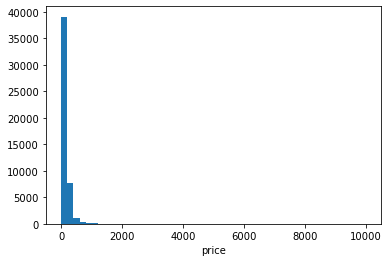

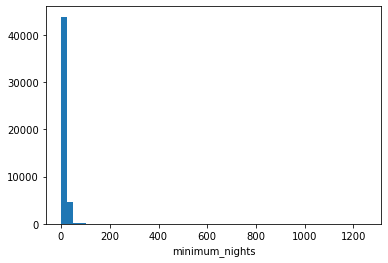

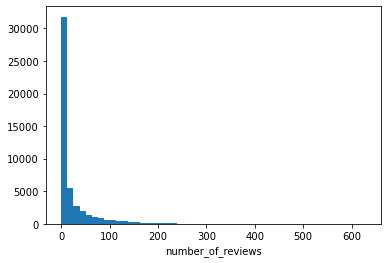

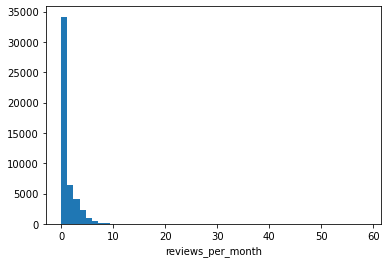

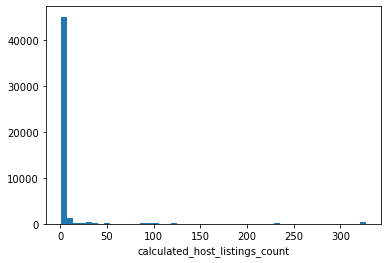

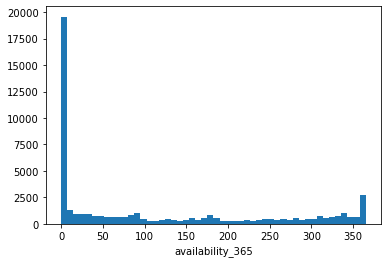

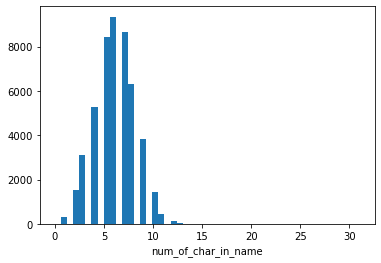

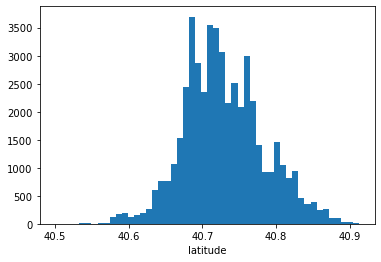

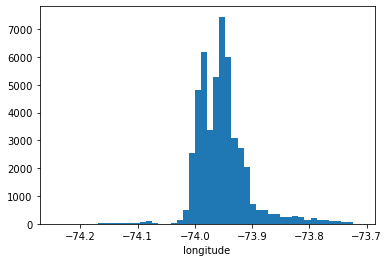

In [18]:
for i in Dist_req_var:
    plt.hist(df[i],bins=50)
    plt.xlabel(i)
    plt.show()

Text(0, 0.5, 'price')

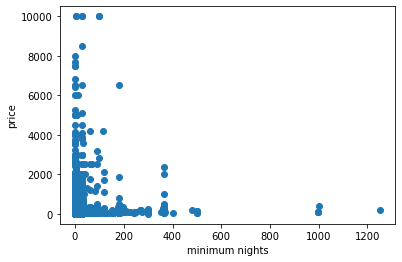

In [19]:
plt.scatter(df['minimum_nights'],df['price'])
plt.xlabel("minimum nights")
plt.ylabel("price")

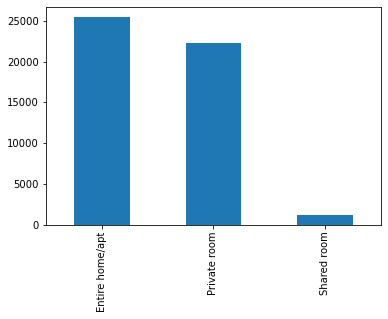

In [23]:
df['room_type'].value_counts().plot(kind='bar')

In [21]:
cat_count_var=['neighbourhood_group','room_type']

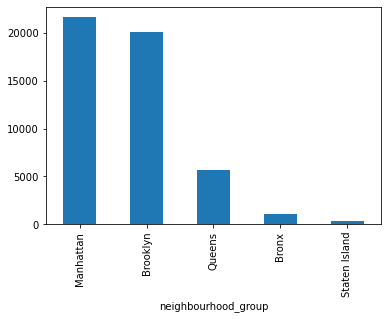

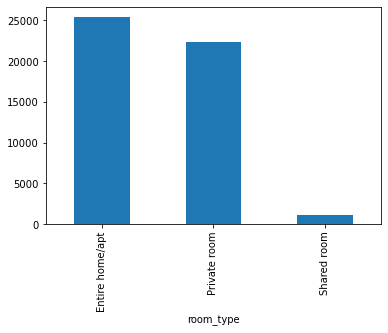

In [22]:
for var in cat_count_var:
    df[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.show()
    

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


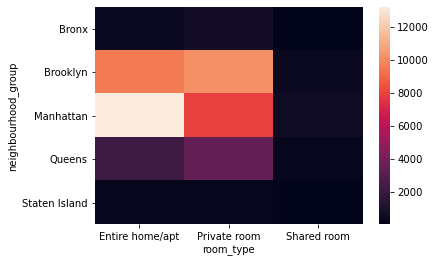

In [45]:
print(pd.crosstab(df["neighbourhood_group"],df["room_type"]))
sns.heatmap(pd.crosstab(df["neighbourhood_group"],df["room_type"]))

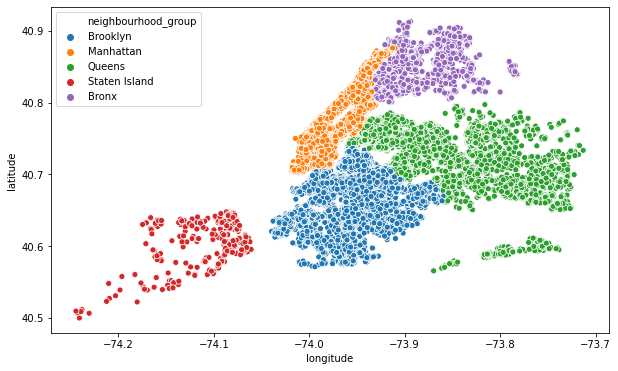

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                          100.0          53.5         40.0
Brooklyn                       145.0          65.0         36.0
Manhattan                      191.0          90.0         69.0
Queens                         120.0          60.0         37.0
Staten Island                  100.0          50.0         30.0


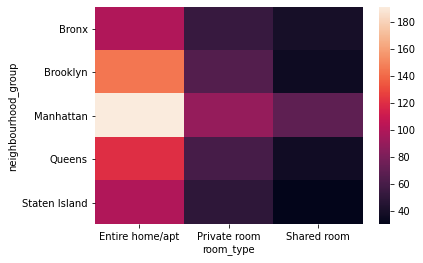

In [51]:
print(pd.pivot_table(df,values='price',index='neighbourhood_group',columns='room_type',aggfunc=np.median))
sns.heatmap(pd.pivot_table(df,values='price',index='neighbourhood_group',columns='room_type',aggfunc=np.median))

In [55]:
df.corr(method='kendall')['price'].sort_values(ascending=False)*100

price                             100.000000
latitude                            9.053206
minimum_nights                      7.423284
availability_365                    6.105251
num_of_char_in_name                 4.955663
id                                 -1.515381
number_of_reviews                  -3.792600
months_from_latest_overall_rev     -3.815480
reviews_per_month                  -4.131802
host_id                            -4.969595
calculated_host_listings_count     -8.532735
longitude                         -30.236075
Name: price, dtype: float64

In [56]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'name_2', 'num_of_char_in_name',
       'months_from_latest_overall_rev'],
      dtype='object')

In [58]:
df1=df.drop(["id","name","last_review"],axis=1)

In [59]:
df1.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_2',
       'num_of_char_in_name', 'months_from_latest_overall_rev'],
      dtype='object')

In [81]:
df1.groupby(by=['host_id','host_name','calculated_host_listings_count'])['price'].count().sort_values(ascending=False)[:10]

host_id    host_name          calculated_host_listings_count
219517861  Sonder (NYC)       327                               327
107434423  Blueground         232                               232
30283594   Kara               121                               121
137358866  Kazuya             103                               103
12243051   Sonder             96                                 96
16098958   Jeremy & Laura     96                                 96
61391963   Corporate Housing  91                                 91
22541573   Ken                87                                 87
200380610  Pranjal            65                                 65
7503643    Vida               52                                 52
Name: price, dtype: int64

<ipython-input-100-0b968e49ab3c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection ="3d")


Text(0.5, 0.92, 'simple 3D scatter plot')

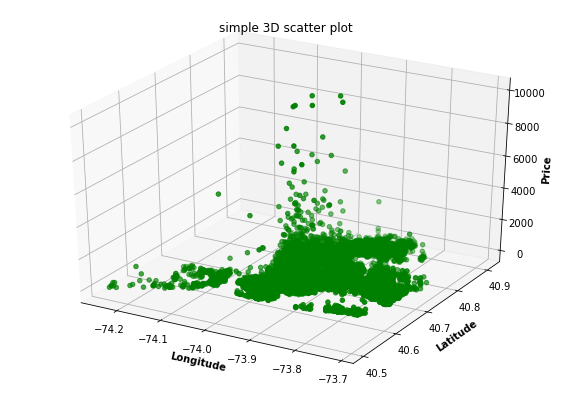

In [100]:
fig = plt.figure(figsize = (10, 7))
plt.title("Lat-Long vs Price")
ax = plt.axes(projection ="3d")
ax.scatter3D(df1['longitude'], df1['latitude'], df1['price'], color = "green")
ax.set_xlabel('Longitude', fontweight ='bold')
ax.set_ylabel('Latitude', fontweight ='bold')
ax.set_zlabel('Price', fontweight ='bold')
plt.title("simple 3D scatter plot")

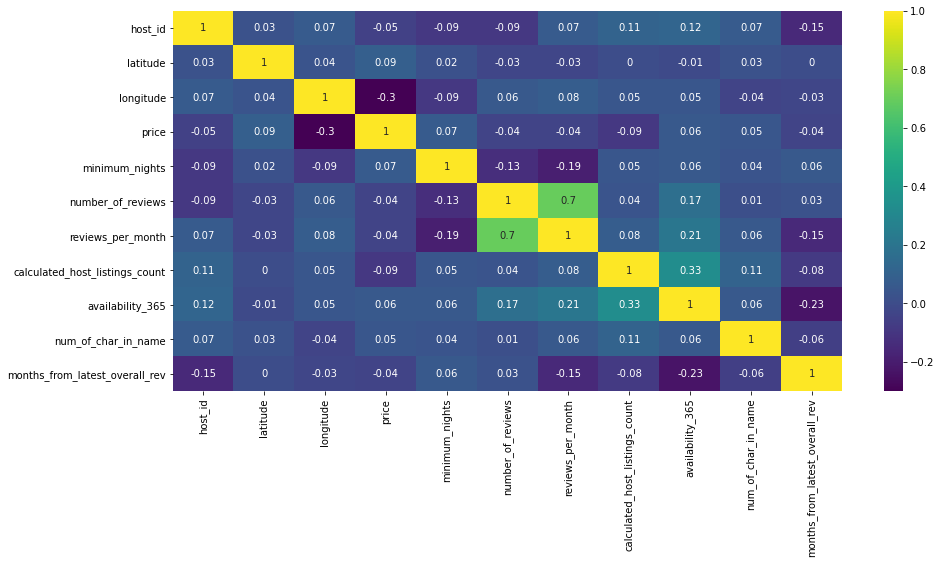

In [109]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df1.corr(method='kendall'),2),cmap='viridis',annot=True)

In [117]:
df1.groupby('room_type')['price'].median()

room_type
Entire home/apt    160
Private room        70
Shared room         45
Name: price, dtype: int64

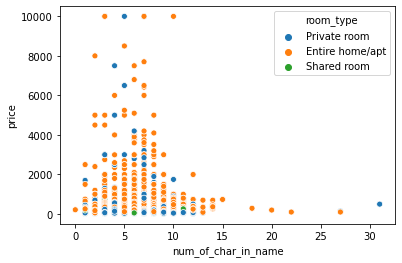

In [119]:
sns.scatterplot(x=df1.num_of_char_in_name,y=df1.price,hue=df1.room_type)

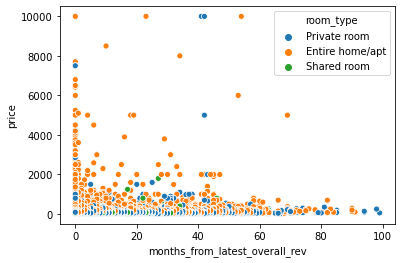

In [120]:
sns.scatterplot(x=df1.months_from_latest_overall_rev,y=df1.price,hue=df1.room_type)